In [1]:
import pandas as pd
import os
def data_dictionary():
    path_train="dataset/"
    list_train=os.listdir(path_train)
    train_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j   
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k)     
        k+=1
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [2]:
data=data_dictionary()

In [3]:
import cv2
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.feature import hog

In [4]:

from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

2023-07-25 11:03:02.399645: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-25 11:03:06.377133: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-07-25 11:03:06.378192: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PA

In [5]:
import numpy as np 
images=[]

for i in data['image_path']:
    img = load_img(i, target_size=(100, 100))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images.append(x)
    
    

In [6]:
dataset=np.array(images)

In [7]:
lable=data['target']

In [8]:
dataset.shape

(23184, 1, 100, 100, 3)

In [9]:
lable=np.array(lable)

In [38]:
import tensorflow as tf
EFFModel=tf.keras.applications.ResNet50( weights = 'imagenet',  include_top = False, input_shape = (100,100 ,3))

In [40]:
del features_train
del features_test


In [ ]:
dataset.shape

(23184, 100, 100, 3)

In [12]:
dataset = np.reshape(dataset, (23184, 100, 100, 3))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense


In [44]:
model=Sequential([ 
                   Dense(500,activation='relu'),
                    Dense(200,activation='relu'),
                  Dense(100,activation='relu'),
                  Dense(23,activation='softmax')

])

In [45]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [55]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split 

In [17]:
import keras
acc=[]
num_classes = 23
lable = keras.utils.to_categorical(lable, num_classes)

In [46]:
lable.shape

(23184, 23)

In [48]:
features_train=EFFModel.predict(dataset)

2023-07-25 12:32:22.866407: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 2782080000 exceeds 10% of free system memory.


725/725 [==============================] - 241s 330ms/step


2023-07-25 12:36:27.856569: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 3038773248 exceeds 10% of free system memory.


In [50]:

features_train=features_train.reshape(23184,-1)

In [51]:
features_train.shape

(23184, 32768)

In [56]:

for i in range(3): 
    x_train,x_test, y_train, y_test=train_test_split(features_train, lable, test_size=0.1,random_state = np.random.randint(1,1000, 1)[0])
    x_train,x_valid,y_train,y_valid= train_test_split(x_train, y_train, test_size=0.1)
    history=model.fit(x_train,y_train,epochs=15,validation_data=(x_valid,y_valid),batch_size=16,verbose=1) 
    model.evaluate(x_test,y_test)

Epoch 1/15


2023-07-25 12:42:21.013481: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 2461270016 exceeds 10% of free system memory.


1174/1174 [==============================] - 76s 64ms/step - loss: 2.1273 - accuracy: 0.4080 - val_loss: 1.3472 - val_accuracy: 0.5913
Epoch 2/15
1174/1174 [==============================] - 84s 72ms/step - loss: 0.9246 - accuracy: 0.7190 - val_loss: 0.8367 - val_accuracy: 0.7484
Epoch 3/15
1174/1174 [==============================] - 76s 64ms/step - loss: 0.5104 - accuracy: 0.8397 - val_loss: 0.6385 - val_accuracy: 0.8079
Epoch 4/15
1174/1174 [==============================] - 75s 63ms/step - loss: 0.3583 - accuracy: 0.8883 - val_loss: 0.6439 - val_accuracy: 0.8265
Epoch 5/15
1174/1174 [==============================] - 74s 63ms/step - loss: 0.2936 - accuracy: 0.9084 - val_loss: 0.7294 - val_accuracy: 0.8083
Epoch 6/15
1174/1174 [==============================] - 74s 63ms/step - loss: 0.2329 - accuracy: 0.9274 - val_loss: 0.6543 - val_accuracy: 0.8457
Epoch 7/15
1174/1174 [==============================] - 75s 64ms/step - loss: 0.2149 - accuracy: 0.9350 - val_loss: 0.5919 - val_accura

2023-07-25 13:01:27.356865: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 2461270016 exceeds 10% of free system memory.


1174/1174 [==============================] - 92s 79ms/step - loss: 0.1933 - accuracy: 0.9489 - val_loss: 0.2175 - val_accuracy: 0.9425
Epoch 2/15
1174/1174 [==============================] - 98s 83ms/step - loss: 0.1217 - accuracy: 0.9658 - val_loss: 0.1424 - val_accuracy: 0.9612
Epoch 3/15
1174/1174 [==============================] - 97s 82ms/step - loss: 0.1219 - accuracy: 0.9660 - val_loss: 0.1626 - val_accuracy: 0.9588
Epoch 4/15
1174/1174 [==============================] - 97s 82ms/step - loss: 0.1196 - accuracy: 0.9677 - val_loss: 0.1628 - val_accuracy: 0.9569
Epoch 5/15
1174/1174 [==============================] - 96s 82ms/step - loss: 0.1212 - accuracy: 0.9669 - val_loss: 0.1627 - val_accuracy: 0.9588
Epoch 6/15
1174/1174 [==============================] - 96s 82ms/step - loss: 0.1249 - accuracy: 0.9675 - val_loss: 0.1271 - val_accuracy: 0.9598
Epoch 7/15
1174/1174 [==============================] - 96s 82ms/step - loss: 0.1095 - accuracy: 0.9704 - val_loss: 0.1876 - val_accura

In [57]:
eval=model.evaluate(x_test,y_test)

73/73 [==============================] - 1s 11ms/step - loss: 0.1832 - accuracy: 0.9737


In [58]:
eval

[0.1831936538219452, 0.9736955761909485]

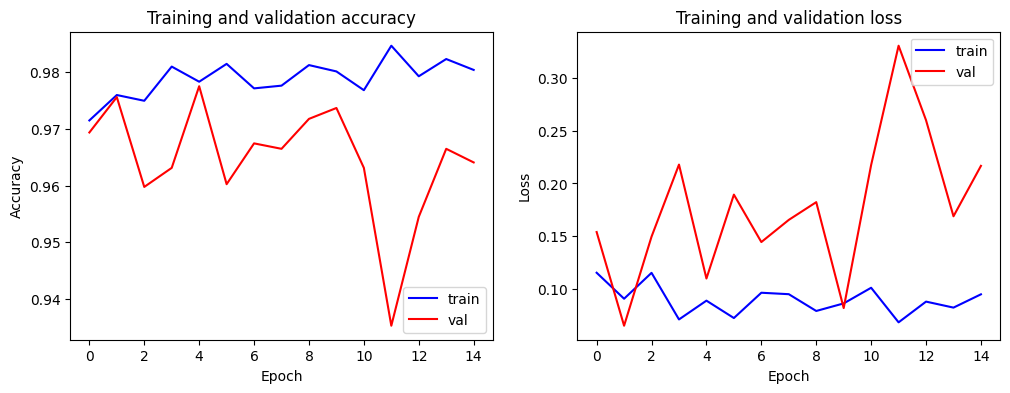

In [59]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))

# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [60]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_pred

73/73 [==============================] - 1s 11ms/step


array([17,  2, 13, ..., 17,  7, 21])

In [61]:
y_test=np.argmax(y_test, axis=1)

In [62]:
from sklearn.metrics import *
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       1.00      0.98      0.99       110
           2       0.99      0.97      0.98       112
           3       0.86      0.89      0.87        98
           4       1.00      0.92      0.96        95
           5       0.97      1.00      0.98        94
           6       0.99      1.00      1.00       105
           7       1.00      0.98      0.99       101
           8       0.99      1.00      0.99        89
           9       1.00      0.99      0.99        87
          10       0.92      0.85      0.88       110
          11       0.99      1.00      1.00       104
          12       0.88      1.00      0.93        86
          13       0.99      0.98      0.99       106
          14       1.00      1.00      1.00       101
          15       0.96      1.00      0.98        97
          16       0.99      0.94      0.97       106
          17       0.99    

In [65]:
acc=accuracy_score(y_test,y_pred)

In [66]:
acc

0.9736955584303579